In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
clockdiv=8
wavelen = int(125000000/clockdiv /50)
wavelen

312500

In [18]:
def getStream(n, counts):
    x = zeros(n)
    state=0
    cc=0
    count = counts[cc]
    maxCount = count
    for i in range(n):
        # print(count1, count)
        x[i]=0
        if (maxCount<=0):
            cc += 1
            count = counts[cc % len(counts)]
            maxCount = count
            # print(count)
        if (state == 0):
            count -= 1
            if (count<=0):
                x[i] = 1
                maxCount = maxCount - 5
                count = maxCount
                state = 1
        elif (state == 1):
            x[i] = 0
            count -= 1
            if (count<=0):
                maxCount = maxCount - 5
                count = maxCount
                state = 0
        # x[i] = 1-x[i]
    return x

a = getStream(wavelen, [wavelen//4096,wavelen//8192,wavelen//16000,wavelen//32000])
            

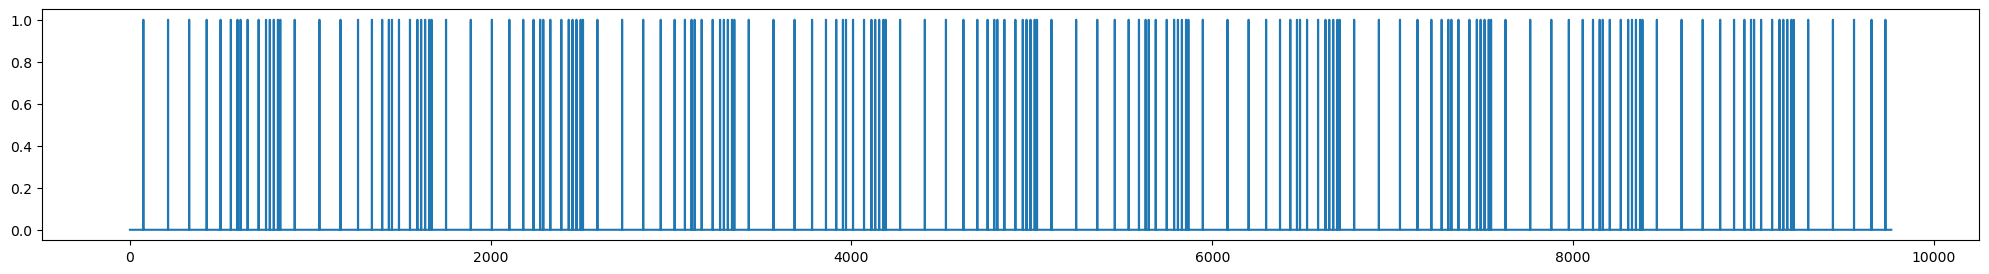

In [19]:
step(arange(wavelen//32),a[:wavelen//32])

In [10]:
from scipy import signal
sos = signal.butter(4, 20000, 'lp', fs=125000000, output='sos')

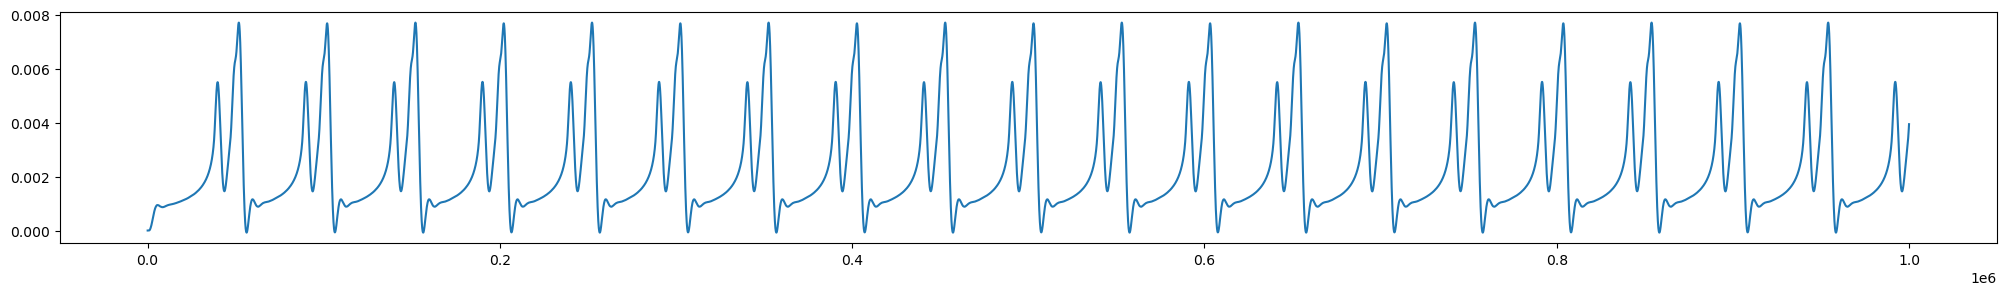

In [11]:
figsize(25,3)
filtered = signal.sosfilt(sos, a)
plot(filtered[:1000000])

In [12]:
import librosa

In [13]:
pow(2,22)

4194304

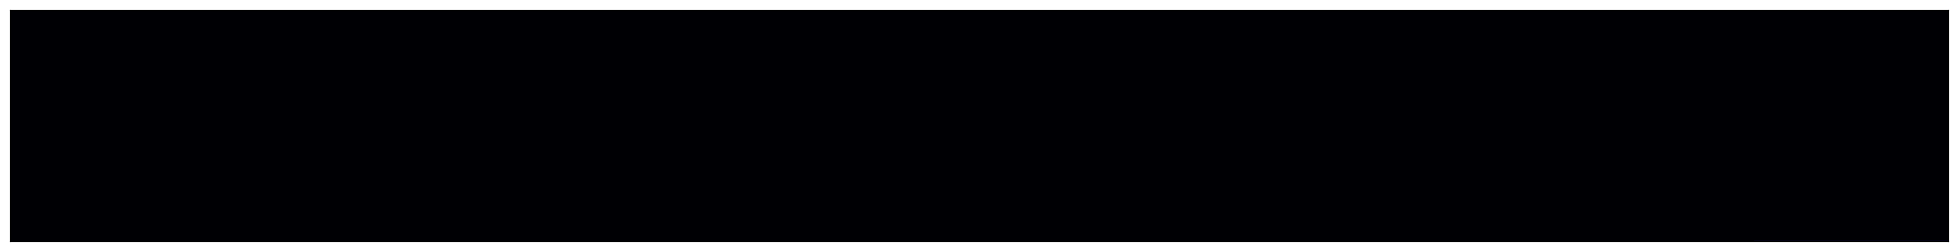

In [14]:
D = librosa.stft(filtered*100, n_fft=pow(2,20))  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db, sr=125000000)

In [200]:
y=0
err=0
phase=0
x = zeros(wavelen*2)
bswavelen=wavelen

bs = zeros_like(x)
for i in range(len(bs)):
    y = 1 if phase >= err else 0
    err = ((bswavelen) if y else 0) - phase + err
    phase = phase + 1
    if (phase >= bswavelen):
        phase=0
    bs[i] = y

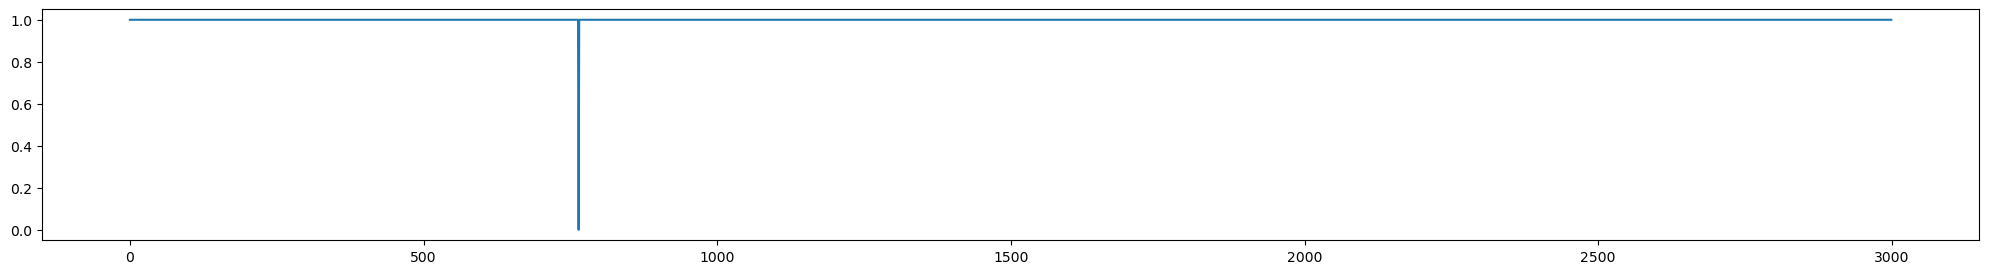

In [201]:
plot(bs[-3000:])

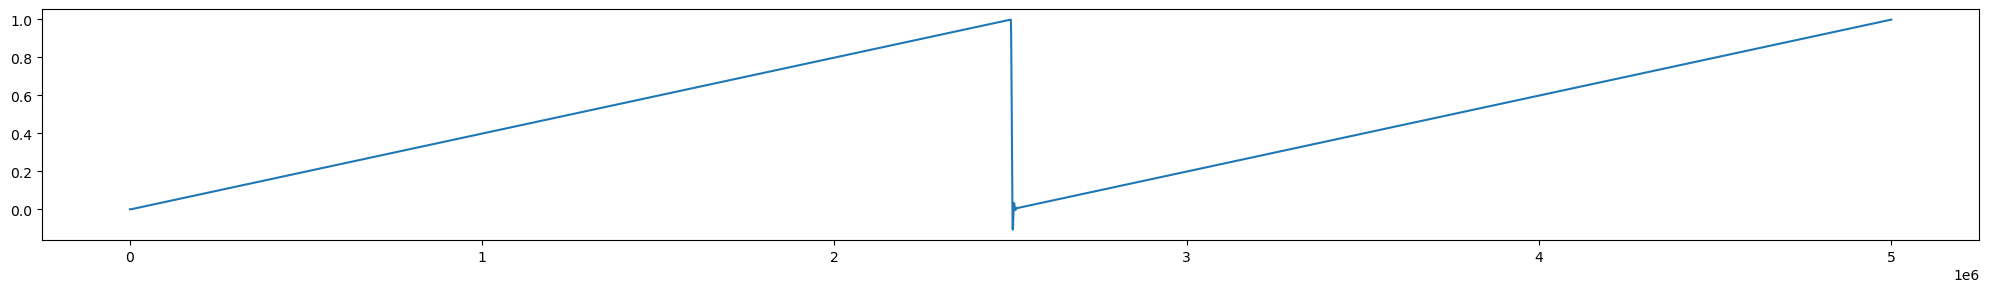

In [204]:
figsize(25,3)
from scipy import signal
sos = signal.butter(4, 18000, 'lp', fs=125000000, output='sos')
filtered = signal.sosfilt(sos, bs)
plot(filtered)